In [4]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from nilearn.plotting import plot_design_matrix
from nilearn.plotting import plot_stat_map
from nilearn.glm import threshold_stats_img
from nilearn.glm.second_level import SecondLevelModel
from nilearn.glm import threshold_stats_img
from nilearn.plotting import  plot_glass_brain

In [5]:
BASE = "/local/anpa/ds003242-1.0.0"
DERIVATIVES = f"{BASE}/derivatives/"
DERIV_OUT = f"{DERIVATIVES}/firstlevel_separate_runs/"  

In [6]:
all_sub_dirs = sorted([p.name.split("sub-")[-1] for p in Path(DERIV_OUT).glob("sub-*") if p.is_dir()])
all_sub_dirs[:3]

['SAXSISO01b', 'SAXSISO01f', 'SAXSISO01s']

In [7]:
fasting_participants = [s for s in all_sub_dirs if s.endswith("f")]
social_participants = [s for s in all_sub_dirs if s.endswith("s")]
baseline_participants = [s for s in all_sub_dirs if s.endswith("b")]

In [8]:
fasting_food = [
    f
    for s in fasting_participants
    for f in Path(f"{DERIV_OUT}/sub-{s}").rglob("*Food_*_effsize.nii.gz")]
fasting_social = [
    f
    for s in fasting_participants
    for f in Path(f'{DERIV_OUT}/sub-{s}').rglob("*Social_*_effsize.nii.gz")]
fasting_control = [
    f
    for s in fasting_participants
    for f in Path(f'{DERIV_OUT}/sub-{s}').rglob("*Control_*_effsize.nii.gz")]

social_food = [
    f
    for s in social_participants
    for f in Path(f'{DERIV_OUT}/sub-{s}').rglob("*Food_*_effsize.nii.gz")]
social_social = [
    f
    for s in social_participants
    for f in Path(f'{DERIV_OUT}/sub-{s}').rglob("*Social_*_effsize.nii.gz")]
social_control = [
    f
    for s in social_participants
    for f in Path(f'{DERIV_OUT}/sub-{s}').rglob("*Control_*_effsize.nii.gz")]

baseline_food = [
    f
    for s in baseline_participants
    for f in Path(f'{DERIV_OUT}/sub-{s}').rglob("*Food_*_effsize.nii.gz")]
baseline_social = [
    f
    for s in baseline_participants
    for f in Path(f'{DERIV_OUT}/sub-{s}').rglob("*Social_*_effsize.nii.gz")]
baseline_control = [
    f
    for s in baseline_participants
    for f in Path(f'{DERIV_OUT}/sub-{s}').rglob("*Control_*_effsize.nii.gz")]

In [12]:
runs_food = [(str(f).split('/')[-1][0], f) for f in fasting_food]
runs_social = [(str(f).split('/')[-1][0], f) for f in fasting_social]
runs_control = [(str(f).split('/')[-1][0], f) for f in fasting_control]

In [ ]:
from nilearn.image import mean_img

# Suppose you have 3 runs for subject 01, condition "fasting"
subject01_fasting_maps = [
    "sub-01_run-01_fasting_contrast.nii.gz",
    "sub-01_run-02_fasting_contrast.nii.gz",
    "sub-01_run-03_fasting_contrast.nii.gz"
]

# Average them into one subject-level map
subject01_fasting_avg = mean_img(subject01_fasting_maps)
subject01_fasting_avg.to_filename("sub-01_fasting_avg.nii.gz")

# Fasting VS baseline

In [9]:
n_subjects = len(fasting_participants)
n_subjects

32

In [10]:
subjects = [p[:-1] for p in fasting_participants]
subjects

['SAXSISO01',
 'SAXSISO02',
 'SAXSISO03',
 'SAXSISO04',
 'SAXSISO08',
 'SAXSISO09',
 'SAXSISO10',
 'SAXSISO11',
 'SAXSISO12',
 'SAXSISO13',
 'SAXSISO14',
 'SAXSISO15',
 'SAXSISO17',
 'SAXSISO18',
 'SAXSISO19',
 'SAXSISO21',
 'SAXSISO22',
 'SAXSISO24',
 'SAXSISO26',
 'SAXSISO27',
 'SAXSISO28',
 'SAXSISO30',
 'SAXSISO32',
 'SAXSISO33',
 'SAXSISO34',
 'SAXSISO35',
 'SAXSISO36',
 'SAXSISO38',
 'SAXSISO39',
 'SAXSISO40',
 'SAXSISO41',
 'SAXSISO42']

In [16]:
second_level_input = fasting_food + baseline_food
second_level_input

[PosixPath('/local/anpa/ds003242-1.0.0/derivatives/firstlevel_separate_runs/sub-SAXSISO01f/0_Food_1_zmap.nii.gz'),
 PosixPath('/local/anpa/ds003242-1.0.0/derivatives/firstlevel_separate_runs/sub-SAXSISO01f/0_Food_2_zmap.nii.gz'),
 PosixPath('/local/anpa/ds003242-1.0.0/derivatives/firstlevel_separate_runs/sub-SAXSISO01f/0_Food_3_zmap.nii.gz'),
 PosixPath('/local/anpa/ds003242-1.0.0/derivatives/firstlevel_separate_runs/sub-SAXSISO01f/1_Food_1_zmap.nii.gz'),
 PosixPath('/local/anpa/ds003242-1.0.0/derivatives/firstlevel_separate_runs/sub-SAXSISO01f/1_Food_2_zmap.nii.gz'),
 PosixPath('/local/anpa/ds003242-1.0.0/derivatives/firstlevel_separate_runs/sub-SAXSISO01f/1_Food_3_zmap.nii.gz'),
 PosixPath('/local/anpa/ds003242-1.0.0/derivatives/firstlevel_separate_runs/sub-SAXSISO01f/2_Food_1_zmap.nii.gz'),
 PosixPath('/local/anpa/ds003242-1.0.0/derivatives/firstlevel_separate_runs/sub-SAXSISO01f/2_Food_2_zmap.nii.gz'),
 PosixPath('/local/anpa/ds003242-1.0.0/derivatives/firstlevel_separate_runs/sub-

In [34]:
condition_effect = np.hstack(([1] * len(fasting_food), [0] * len(baseline_food)))
condition_effect.shape

(1143,)

In [ ]:
subject_effect = np.vstack((np.eye(n_subjects), np.eye(n_subjects)))
subject_effect    

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [26]:
paired_design_matrix = pd.DataFrame(
    np.hstack((condition_effect[:, np.newaxis], subject_effect)),
    columns=["fasting vs baseline", *subjects],
)
paired_design_matrix

,fasting vs baseline,SAXSISO01,SAXSISO02,SAXSISO03,SAXSISO04,SAXSISO08,SAXSISO09,SAXSISO10,SAXSISO11,SAXSISO12,...,SAXSISO32,SAXSISO33,SAXSISO34,SAXSISO35,SAXSISO36,SAXSISO38,SAXSISO39,SAXSISO40,SAXSISO41,SAXSISO42
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<Axes: label='conditions', ylabel='scan number'>

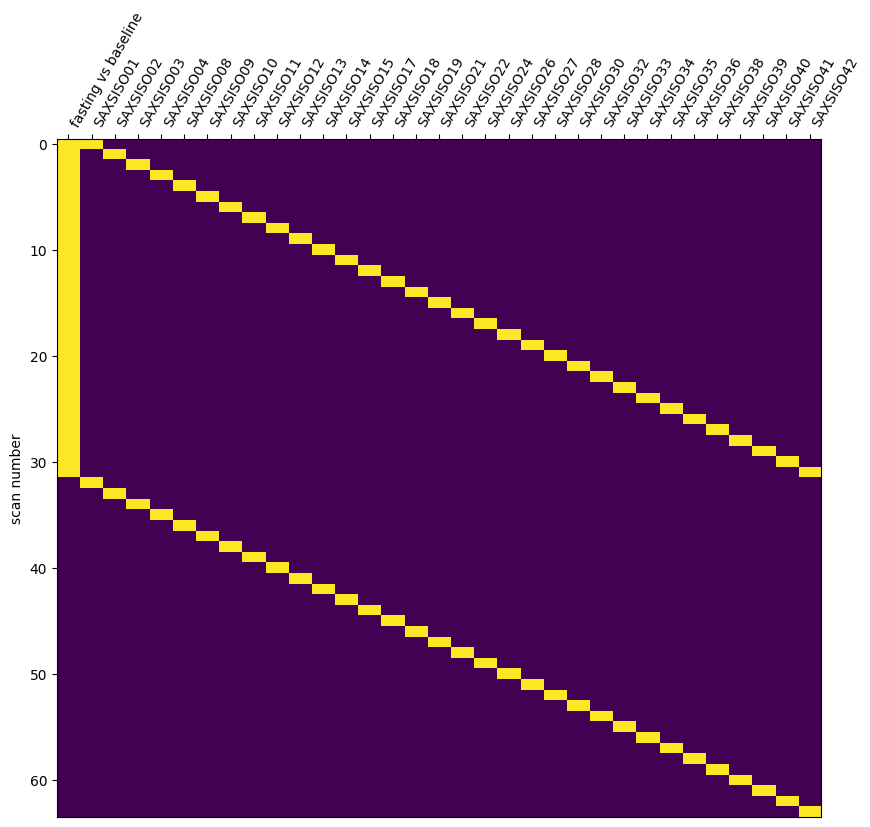

In [ ]:
plot_design_matrix(paired_design_matrix, rescale=False)


In [32]:
second_level_model_paired = SecondLevelModel(n_jobs=2).fit(
    second_level_input, design_matrix=paired_design_matrix
)

In [33]:
stat_maps_paired = second_level_model_paired.compute_contrast(
    "fasting vs baseline", output_type="all"
)
stat_maps_paired

ValueError: design_matrix does not match the number of maps considered. 64 rows in design matrix do not match with 1143 maps.